In [1]:
import pandas as pd
df1 = pd.read_csv('StreamingHistory0.csv')
df2 = pd.read_csv('StreamingHistory1.csv')

df = pd.concat([df1, df2])
df.head()

,endTime,artistName,trackName,msPlayed
0,2021-03-15 22:12,Korn,Blind,171780
1,2021-03-16 16:02,Korn,Blind,8500
2,2021-03-16 16:09,Vulfpeck,Dean Town,70270
3,2021-03-16 16:12,The Greyboy Allstars,V Neck Sweater,155280
4,2021-03-16 16:12,Vulfpeck,Cory Wong,830


In [2]:
df['year'] = df['endTime'].str.split('-').str[0]
df.head()

,endTime,artistName,trackName,msPlayed,year
0,2021-03-15 22:12,Korn,Blind,171780,2021
1,2021-03-16 16:02,Korn,Blind,8500,2021
2,2021-03-16 16:09,Vulfpeck,Dean Town,70270,2021
3,2021-03-16 16:12,The Greyboy Allstars,V Neck Sweater,155280,2021
4,2021-03-16 16:12,Vulfpeck,Cory Wong,830,2021


In [3]:
df['month'] = df['endTime'].str.split('-').str[1]
df['time'] = df['endTime'].str.split(' ').str[1]
df['seconds_played'] = df['msPlayed']/1000
df['minutes_played'] = df['seconds_played']/60
df.drop('msPlayed', inplace=True, axis=1)
df.head()

,endTime,artistName,trackName,year,month,time,seconds_played,minutes_played
0,2021-03-15 22:12,Korn,Blind,2021,03,22:12,171.78,2.863000
1,2021-03-16 16:02,Korn,Blind,2021,03,16:02,8.50,0.141667
2,2021-03-16 16:09,Vulfpeck,Dean Town,2021,03,16:09,70.27,1.171167
3,2021-03-16 16:12,The Greyboy Allstars,V Neck Sweater,2021,03,16:12,155.28,2.588000
4,2021-03-16 16:12,Vulfpeck,Cory Wong,2021,03,16:12,0.83,0.013833


In [4]:
indexes = df[df['minutes_played'] < 0.5].index
df.drop(index=indexes, inplace=True, axis=0)
df

,endTime,artistName,trackName,year,month,time,seconds_played,minutes_played
0,2021-03-15 22:12,Korn,Blind,2021,03,22:12,171.780,2.863000
2,2021-03-16 16:09,Vulfpeck,Dean Town,2021,03,16:09,70.270,1.171167
3,2021-03-16 16:12,The Greyboy Allstars,V Neck Sweater,2021,03,16:12,155.280,2.588000
5,2021-03-16 16:16,Rush,Tom Sawyer,2021,03,16:16,269.580,4.493000
8,2021-03-16 16:19,Dire Straits,Money For Nothing,2021,03,16:19,121.200,2.020000
...,...,...,...,...,...,...,...,...
2662,2022-03-16 16:48,Talking Heads,Psycho Killer - 2005 Remaster,2022,03,16:48,261.413,4.356883
2663,2022-03-16 16:51,Sly & The Family Stone,If You Want Me to Stay,2022,03,16:51,180.493,3.008217
2664,2022-03-16 16:56,The Brothers Johnson,Strawberry Letter 23,2022,03,16:56,299.066,4.984433
2665,2022-03-16 17:00,Willy Crook,Fool Times,2022,03,17:00,236.400,3.940000


In [5]:
df.head()

,endTime,artistName,trackName,year,month,time,seconds_played,minutes_played
0,2021-03-15 22:12,Korn,Blind,2021,03,22:12,171.78,2.863000
2,2021-03-16 16:09,Vulfpeck,Dean Town,2021,03,16:09,70.27,1.171167
3,2021-03-16 16:12,The Greyboy Allstars,V Neck Sweater,2021,03,16:12,155.28,2.588000
5,2021-03-16 16:16,Rush,Tom Sawyer,2021,03,16:16,269.58,4.493000
8,2021-03-16 16:19,Dire Straits,Money For Nothing,2021,03,16:19,121.20,2.020000


In [6]:
df['hora_del_dia'] = df['endTime'].str.split(' ').str[1]
df['hora'] = df['hora_del_dia'].str.split(':').str[0]
df.head()

,endTime,artistName,trackName,year,month,time,seconds_played,minutes_played,hora_del_dia,hora
0,2021-03-15 22:12,Korn,Blind,2021,03,22:12,171.78,2.863000,22:12,22
2,2021-03-16 16:09,Vulfpeck,Dean Town,2021,03,16:09,70.27,1.171167,16:09,16
3,2021-03-16 16:12,The Greyboy Allstars,V Neck Sweater,2021,03,16:12,155.28,2.588000,16:12,16
5,2021-03-16 16:16,Rush,Tom Sawyer,2021,03,16:16,269.58,4.493000,16:16,16
8,2021-03-16 16:19,Dire Straits,Money For Nothing,2021,03,16:19,121.20,2.020000,16:19,16


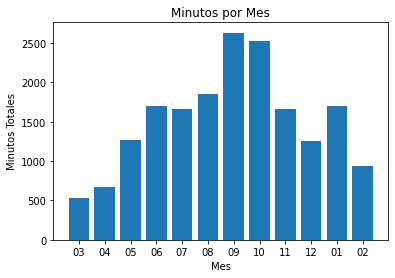

In [7]:
import matplotlib.pyplot as plt

minutes_sum = []

for i in df['minutes_played'].groupby(df['month']).sum():
    minutes_sum.append(i)

months = df['month'].unique()

plt.bar(months, minutes_sum)
plt.title('Minutos por Mes')
plt.xlabel('Mes')
plt.ylabel('Minutos Totales')
plt.show()

In [8]:
df['minutes_played'].groupby(df['hora']).sum()
a = df['hora'].unique()
sorted(a)

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

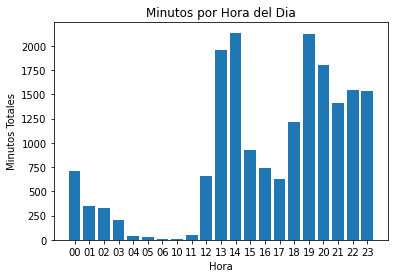

In [9]:
minutes_sum = []

for i in df['minutes_played'].groupby(df['hora']).sum():
    minutes_sum.append(i)

time = sorted(df['hora'].unique())

plt.bar(time, minutes_sum)
plt.title('Minutos por Hora del Dia')
plt.xlabel('Hora')
plt.ylabel('Minutos Totales')
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5102 entries, 0 to 2676
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   endTime         5102 non-null   object 
 1   artistName      5102 non-null   object 
 2   trackName       5102 non-null   object 
 3   year            5102 non-null   object 
 4   month           5102 non-null   object 
 5   time            5102 non-null   object 
 6   seconds_played  5102 non-null   float64
 7   minutes_played  5102 non-null   float64
 8   hora_del_dia    5102 non-null   object 
 9   hora            5102 non-null   object 
dtypes: float64(2), object(8)
memory usage: 438.5+ KB


In [11]:
df.value_counts

<bound method DataFrame.value_counts of                endTime                artistName  \
0     2021-03-15 22:12                      Korn   
2     2021-03-16 16:09                  Vulfpeck   
3     2021-03-16 16:12      The Greyboy Allstars   
5     2021-03-16 16:16                      Rush   
8     2021-03-16 16:19              Dire Straits   
...                ...                       ...   
2662  2022-03-16 16:48             Talking Heads   
2663  2022-03-16 16:51    Sly & The Family Stone   
2664  2022-03-16 16:56      The Brothers Johnson   
2665  2022-03-16 17:00               Willy Crook   
2676  2022-03-16 23:59  The Alan Parsons Project   

                          trackName  year month   time  seconds_played  \
0                             Blind  2021    03  22:12         171.780   
2                         Dean Town  2021    03  16:09          70.270   
3                    V Neck Sweater  2021    03  16:12         155.280   
5                        Tom Sawyer  20

In [12]:
df['artistName'].value_counts()

Talking Heads               231
The New Mastersounds        218
The Alan Parsons Project    195
Red Hot Chili Peppers       127
The Meters                  116
                           ... 
Groove Da Praia               1
Phairo                        1
GoGo Penguin                  1
Jesse Bru                     1
Prophets Of Rage              1
Name: artistName, Length: 567, dtype: int64

In [13]:
df.to_csv('spotify_data.csv')